In [1]:
import numpy as np 
import pandas as pd

# import cv2

import allensdk
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns

from scipy.ndimage import gaussian_filter1d

import sklearn
from sklearn.decomposition import PCA

import torch
from torch import nn
from torchvision.transforms import Resize

sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
matplotlib.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 150

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
cache_dir = r"Data"
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

In [4]:
behavior_session_table = bc.get_behavior_session_table()  
ophys_session_table = bc.get_ophys_session_table()   
experiment_table = bc.get_ophys_experiment_table()

print(f"Number of behavior sessions = {len(behavior_session_table)}")
print(f"Number of ophys sessions = {len(ophys_session_table)}")
print(f"Number of ophys experiments = {len(experiment_table)}")

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936


In [5]:
# PC, ViP, SST lines 
pc_line_str = 'Slc17a7-IRES2-Cre' 
sst_line_str = 'Sst-IRES-Cre'
vip_line_str = 'Vip-IRES-Cre'  

In [6]:
# filtering by cell type 
pc_exp_table = experiment_table[(experiment_table.cre_line==pc_line_str)]
vip_exp_table = experiment_table[(experiment_table.cre_line==vip_line_str)]
sst_exp_table = experiment_table[(experiment_table.cre_line==sst_line_str)]

# numbers 
print(f"Number of experiments with PC neurons = {len(pc_exp_table)}")
print(f"Number of experiments with VIP neurons = {len(vip_exp_table)}")
print(f"Number of experiments with SST neurons = {len(sst_exp_table)}")

Number of experiments with PC neurons = 871
Number of experiments with VIP neurons = 663
Number of experiments with SST neurons = 402


#### Download specific experiment

In [7]:
## Specific experiments

## Length of recordings vary, but roughly in the 40k range

## V1
pyr_exp_V1_L23 = bc.get_behavior_ophys_experiment(pc_exp_table.index[1]) ## new
sst_exp_V1_L23 = bc.get_behavior_ophys_experiment(sst_exp_table.index[0]) ## new
vip_exp_V1_L23 = bc.get_behavior_ophys_experiment(vip_exp_table.index[0]) ## new

pyr_exp_V1_L4 = bc.get_behavior_ophys_experiment(pc_exp_table.index[36]) ## new
sst_exp_V1_L4 = bc.get_behavior_ophys_experiment(sst_exp_table.index[0]) ## new
vip_exp_V1_L4 = bc.get_behavior_ophys_experiment(vip_exp_table.index[86]) ## new

pyr_exp_V1_L5 = bc.get_behavior_ophys_experiment(pc_exp_table.index[36]) ## new
sst_exp_V1_L5 = bc.get_behavior_ophys_experiment(sst_exp_table.index[120]) ## new
vip_exp_V1_L5 = bc.get_behavior_ophys_experiment(vip_exp_table.index[417]) ## new

## LM
pyr_exp_LM_L23 = bc.get_behavior_ophys_experiment(pc_exp_table.index[52]) ## new 
sst_exp_LM_L23 = bc.get_behavior_ophys_experiment(sst_exp_table.index[0]) ## new
vip_exp_LM_L23 = bc.get_behavior_ophys_experiment(vip_exp_table.index[42]) ## new

pyr_exp_LM_L4 = bc.get_behavior_ophys_experiment(pc_exp_table.index[36]) ## new
sst_exp_LM_L4 = bc.get_behavior_ophys_experiment(sst_exp_table.index[0]) ## new
vip_exp_LM_L4 = bc.get_behavior_ophys_experiment(vip_exp_table.index[86]) ## new

pyr_exp_LM_L5 = bc.get_behavior_ophys_experiment(pc_exp_table.index[36]) ## new
sst_exp_LM_L5 = bc.get_behavior_ophys_experiment(sst_exp_table.index[120]) ## new
vip_exp_LM_L5 = bc.get_behavior_ophys_experiment(vip_exp_table.index[199]) ## new

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.8.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.5.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.8.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.5.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.

In [8]:
dataset = pyr_exp_V1_L4 
filtered_stimuli = dataset.stimulus_presentations[(dataset.stimulus_presentations['start_time'] >= 1500) &
        (dataset.stimulus_presentations['start_time'] <= 2000)]
images = [image_name for image_name in filtered_stimuli['image_name']]
# filtered_stimuli = dataset.stimulus_presentations[(dataset.stimulus_presentations['start_time'] >= start_time) &
#         (dataset.stimulus_presentations['start_time'] <= stop_time)]

In [9]:
images

['im085',
 'im085',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'omitted',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im065',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im069',
 'im066',
 'im066',
 'im066',
 'im066'

Text(0.5, 1.0, '(100, 100)')

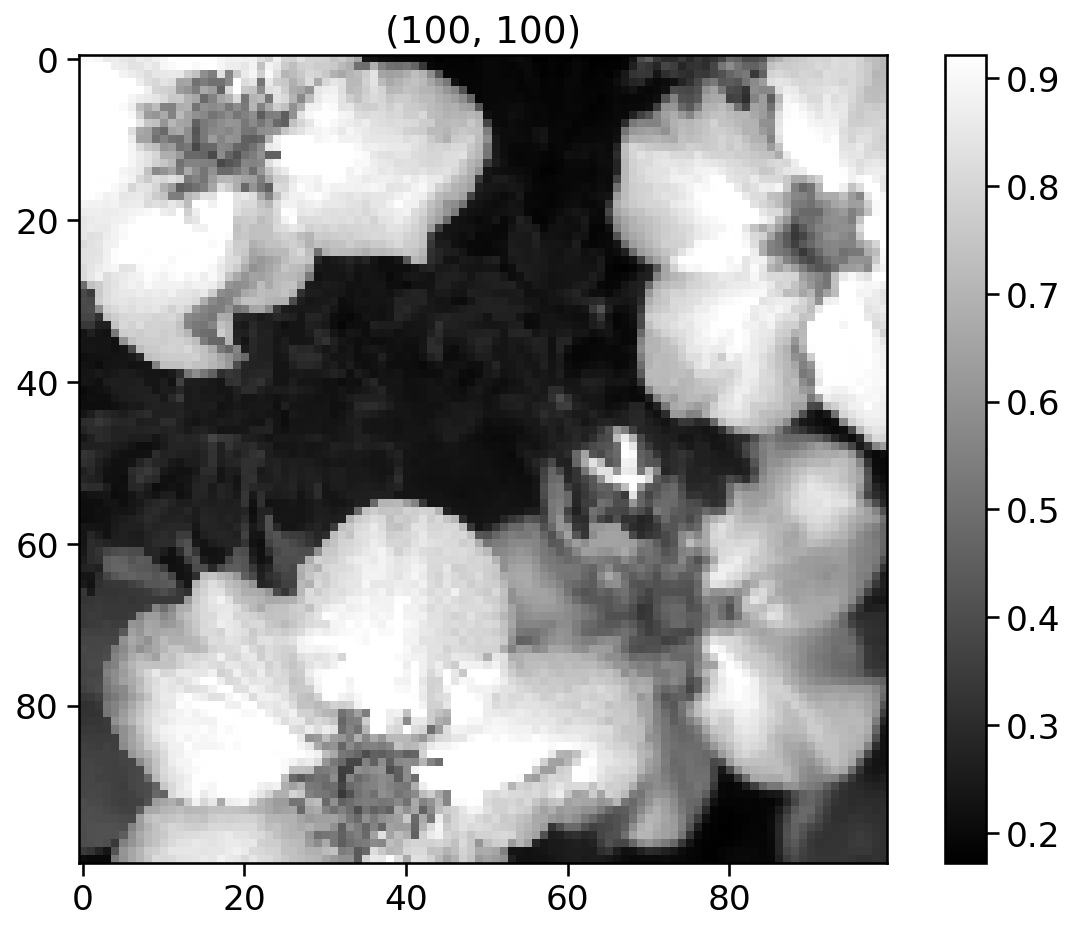

In [10]:
im = 'im065'

default_color = (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
img = dataset.stimulus_templates['unwarped'].get(im, default_color)/256
img = img[300:1000:7,600:1300:7]
plt.imshow(img,cmap='gray')
plt.colorbar()
plt.title(img.shape)
# np.save(im,img)

In [11]:
seq_len = 49

dff_V1_L4_pyr = np.vstack(pyr_exp_V1_L4.dff_traces['dff'].values)[:,:seq_len+1]
dff_V1_L4_sst = np.vstack(sst_exp_V1_L4.dff_traces['dff'].values)[:,:seq_len+1]
dff_V1_L4_vip = np.vstack(vip_exp_V1_L4.dff_traces['dff'].values)[:,:seq_len+1]

dff_V1_L23_pyr = np.vstack(pyr_exp_V1_L23.dff_traces['dff'].values)[:,:seq_len+1]
dff_V1_L23_sst = np.vstack(sst_exp_V1_L23.dff_traces['dff'].values)[:,:seq_len+1]
dff_V1_L23_vip = np.vstack(vip_exp_V1_L23.dff_traces['dff'].values)[:,:seq_len+1]

dff_V1_L5_pyr = np.vstack(pyr_exp_V1_L5.dff_traces['dff'].values)[:,:seq_len+1]
dff_V1_L5_sst = np.vstack(sst_exp_V1_L5.dff_traces['dff'].values)[:,:seq_len+1]
dff_V1_L5_vip = np.vstack(vip_exp_V1_L5.dff_traces['dff'].values)[:,:seq_len+1]

In [12]:
# pyr_exp_LM_L4.dff_traces['dff'].values[0].shape

In [13]:
dff_LM_L4_pyr = np.vstack(pyr_exp_LM_L4.dff_traces['dff'].values)[:,:seq_len+1]
dff_LM_L4_sst = np.vstack(sst_exp_LM_L4.dff_traces['dff'].values)[:,:seq_len+1]
dff_LM_L4_vip = np.vstack(vip_exp_LM_L4.dff_traces['dff'].values)[:,:seq_len+1]

dff_LM_L23_pyr = np.vstack(pyr_exp_LM_L23.dff_traces['dff'].values)[:,:seq_len+1]
dff_LM_L23_sst = np.vstack(sst_exp_LM_L23.dff_traces['dff'].values)[:,:seq_len+1]
dff_LM_L23_vip = np.vstack(vip_exp_LM_L23.dff_traces['dff'].values)[:,:seq_len+1]

dff_LM_L5_pyr = np.vstack(pyr_exp_LM_L5.dff_traces['dff'].values)[:,:seq_len+1]
dff_LM_L5_sst = np.vstack(sst_exp_LM_L5.dff_traces['dff'].values)[:,:seq_len+1]
dff_LM_L5_vip = np.vstack(vip_exp_LM_L5.dff_traces['dff'].values)[:,:seq_len+1]

In [14]:
def generate_random_averages(arr, num_samples=1000, num_neurons=60, filtering = True, sigma = 2):
    n, seqLen_full = arr.shape
    seqLen = seqLen_full-1
    ## recon
#     seqLen = seqLen_full
    
    arr_train = np.zeros((num_samples,seqLen))
    arr_test = np.zeros((num_samples,seqLen))
    
    idxs = np.random.choice(n, (num_samples,num_neurons), replace=True)
    
    for ii in range(num_samples):
        arr_train[ii] = np.mean(arr[idxs[ii]],0)[:seqLen]
        arr_test[ii] = np.mean(arr[idxs[ii]],0)[1:]
        ## recon
#         arr_train[ii] = np.mean(arr[idxs[ii]],0)[:seqLen]
#         arr_test[ii] = np.mean(arr[idxs[ii]],0)[0:]

    if filtering:
        arr_train = gaussian_filter1d(arr_train, sigma)
        arr_test = gaussian_filter1d(arr_test, sigma)

    return arr_train, arr_test

In [15]:
dff_V1_L4_pyr_train, dff_V1_L4_pyr_test = generate_random_averages(dff_V1_L4_pyr)
dff_V1_L4_sst_train, dff_V1_L4_sst_test = generate_random_averages(dff_V1_L4_sst)
dff_V1_L4_vip_train, dff_V1_L4_vip_test = generate_random_averages(dff_V1_L4_vip)

dff_V1_L23_pyr_train, dff_V1_L23_pyr_test = generate_random_averages(dff_V1_L23_pyr)
dff_V1_L23_sst_train, dff_V1_L23_sst_test = generate_random_averages(dff_V1_L23_sst)
dff_V1_L23_vip_train, dff_V1_L23_vip_test = generate_random_averages(dff_V1_L23_vip)

dff_V1_L5_pyr_train, dff_V1_L5_pyr_test = generate_random_averages(dff_V1_L5_pyr)
dff_V1_L5_sst_train, dff_V1_L5_sst_test = generate_random_averages(dff_V1_L5_sst)
dff_V1_L5_vip_train, dff_V1_L5_vip_test = generate_random_averages(dff_V1_L5_vip)

In [16]:
dff_LM_L4_pyr_train, dff_LM_L4_pyr_test = generate_random_averages(dff_LM_L4_pyr)
dff_LM_L4_sst_train, dff_LM_L4_sst_test = generate_random_averages(dff_LM_L4_sst)
dff_LM_L4_vip_train, dff_LM_L4_vip_test = generate_random_averages(dff_LM_L4_vip)

dff_LM_L23_pyr_train, dff_LM_L23_pyr_test = generate_random_averages(dff_LM_L23_pyr)
dff_LM_L23_sst_train, dff_LM_L23_sst_test = generate_random_averages(dff_LM_L23_sst)
dff_LM_L23_vip_train, dff_LM_L23_vip_test = generate_random_averages(dff_LM_L23_vip)

dff_LM_L5_pyr_train, dff_LM_L5_pyr_test = generate_random_averages(dff_LM_L5_pyr)
dff_LM_L5_sst_train, dff_LM_L5_sst_test = generate_random_averages(dff_LM_L5_sst)
dff_LM_L5_vip_train, dff_LM_L5_vip_test = generate_random_averages(dff_LM_L5_vip)

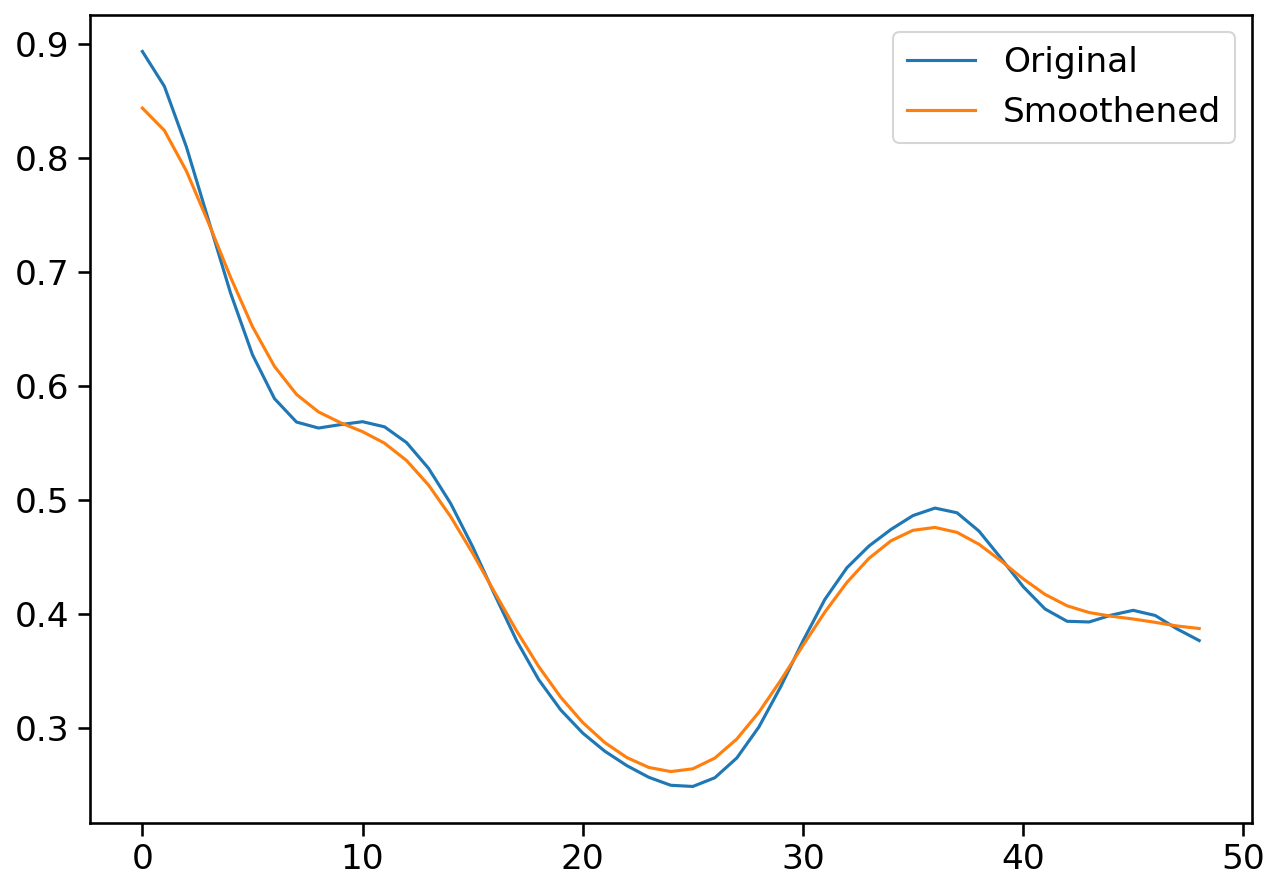

In [17]:
og = dff_LM_L5_vip_train
filt = gaussian_filter1d(og,2)

kk = 38

plt.plot(og[kk], label = 'Original')
plt.plot(filt[kk], label = 'Smoothened')
plt.legend()

In [18]:
np.save('dff_V1_L4_pyr_train.npy',dff_V1_L4_pyr_train)
np.save('dff_V1_L23_pyr_train.npy',dff_V1_L23_pyr_train)
np.save('dff_V1_L5_pyr_train.npy',dff_V1_L5_pyr_train)

np.save('dff_V1_L4_sst_train.npy', dff_V1_L4_sst_train)
np.save('dff_V1_L23_sst_train.npy', dff_V1_L23_sst_train)
np.save('dff_V1_L5_sst_train.npy', dff_V1_L5_sst_train)

np.save('dff_V1_L4_vip_train.npy', dff_V1_L4_vip_train)
np.save('dff_V1_L23_vip_train.npy', dff_V1_L23_vip_train)
np.save('dff_V1_L5_vip_train.npy', dff_V1_L5_vip_train)

np.save('dff_LM_L4_pyr_train.npy', dff_LM_L4_pyr_train)
np.save('dff_LM_L23_pyr_train.npy', dff_LM_L23_pyr_train)
np.save('dff_LM_L5_pyr_train.npy', dff_LM_L5_pyr_train)

np.save('dff_LM_L4_sst_train.npy', dff_LM_L4_sst_train)
np.save('dff_LM_L23_sst_train.npy', dff_LM_L23_sst_train)
np.save('dff_LM_L5_sst_train.npy', dff_LM_L5_sst_train)

np.save('dff_LM_L4_vip_train.npy', dff_LM_L4_vip_train)
np.save('dff_LM_L23_vip_train.npy', dff_LM_L23_vip_train)
np.save('dff_LM_L5_vip_train.npy', dff_LM_L5_vip_train)

In [19]:
np.save('dff_V1_L4_pyr_test.npy', dff_V1_L4_pyr_test)
np.save('dff_V1_L23_pyr_test.npy', dff_V1_L23_pyr_test)
np.save('dff_V1_L5_pyr_test.npy', dff_V1_L5_pyr_test)

np.save('dff_V1_L4_sst_test.npy', dff_V1_L4_sst_test)
np.save('dff_V1_L23_sst_test.npy', dff_V1_L23_sst_test)
np.save('dff_V1_L5_sst_test.npy', dff_V1_L5_sst_test)

np.save('dff_V1_L4_vip_test.npy', dff_V1_L4_vip_test)
np.save('dff_V1_L23_vip_test.npy', dff_V1_L23_vip_test)
np.save('dff_V1_L5_vip_test.npy', dff_V1_L5_vip_test)

np.save('dff_LM_L4_pyr_test.npy', dff_LM_L4_pyr_test)
np.save('dff_LM_L23_pyr_test.npy', dff_LM_L23_pyr_test)
np.save('dff_LM_L5_pyr_test.npy', dff_LM_L5_pyr_test)

np.save('dff_LM_L4_sst_test.npy', dff_LM_L4_sst_test)
np.save('dff_LM_L23_sst_test.npy', dff_LM_L23_sst_test)
np.save('dff_LM_L5_sst_test.npy', dff_LM_L5_sst_test)

np.save('dff_LM_L4_vip_test.npy', dff_LM_L4_vip_test)
np.save('dff_LM_L23_vip_test.npy', dff_LM_L23_vip_test)
np.save('dff_LM_L5_vip_test.npy', dff_LM_L5_vip_test)

In [ ]:
## Note, having issues with opening expt 0 (PC)

## img depths 75, 175 (L2/3), 275 (L4), 375 (L5) 

pc_sample_exp = bc.get_behavior_ophys_experiment(pc_exp_table.index[1])
vip_sample_exp = bc.get_behavior_ophys_experiment(vip_exp_table.index[1])
sst_sample_exp = bc.get_behavior_ophys_experiment(sst_exp_table.index[1])

In [ ]:
# bc.get_behavior_ophys_experiment(pc_exp_table.index[200]).metadata

In [ ]:
# bc.get_behavior_ophys_experiment(sst_exp_table.index[300]).metadata

In [ ]:
# bc.get_behavior_ophys_experiment(vip_exp_table.index[300]).metadata

In [ ]:
# metadata for the PC experiment
# pc_sample_exp.metadata

In [ ]:
# dff_array = np.vstack(pc_sample_exp.dff_traces['dff'].values)

In [ ]:
# plt.plot(dff_array[0])

In [ ]:
# meta data for the SST experiment 
# sst_sample_exp.metadata

In [ ]:
# metadata for the VIP experiment
# vip_sample_exp.metadata